<a href="https://colab.research.google.com/github/motorio0829/DL-for-AI/blob/main/chapter04_getting_started_with_neural_networks_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
# num_words: 자주 등장하는 상위 1만개의 단어만 이

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_data.shape

(25000,)

In [4]:
train_labels[0]

np.int64(1)

In [6]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [7]:
# 숫자를 다시 글자로 디코딩
# word_index에는 단어:숫자 순서로 딕셔너리가 매핑되어 있음
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
    # word_index에 저장된 단어:숫자 순서를 숫자:단어 순서로 바꾸어
    # 다음 줄의 코드에서 숫자를 이용해서 단어를 찾도록 바꿔줌
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[2]])
# word_index에서 인덱스 0,1,2는 특수 토큰에 사용되므로 i-3, 딕셔너리에 없는 경우 ? 반환
# train_data들을 각각 출력해보면 무조건 시작이 1로 시작함
# 이는 0: 패딩(길이맞추기), 1: START 토큰, 2: Unknown 토큰으로 인덱스 0,1,2가 할당되어있기 때문임
# 그래서 0,1,2를 제외하기 위해 3을 빼준다

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [15]:
list(word_index.items())[:10]

[('fawn', 34701),
 ('tsukino', 52006),
 ('nunnery', 52007),
 ('sonja', 16816),
 ('vani', 63951),
 ('woods', 1408),
 ('spiders', 16115),
 ('hanging', 2345),
 ('woody', 2289),
 ('trawling', 52008)]

In [14]:
list(reverse_word_index.items())[:10]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling')]

In [11]:
[(value, key) for (key, value) in word_index.items()][:10]

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling')]

In [12]:
decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [19]:
import numpy as np
import tensorflow as tf
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1. # 단어가 존재하면 0을 1로 바꿈

    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train.shape

(25000, 10000)

In [21]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [42]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [43]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [44]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [45]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
# 모델의 fitting 결과를 history 이렇게 변수에 저정할 수 있고

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.6982 - loss: 0.6019 - val_accuracy: 0.8680 - val_loss: 0.4088
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9008 - loss: 0.3482 - val_accuracy: 0.8869 - val_loss: 0.3182
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9179 - loss: 0.2587 - val_accuracy: 0.8783 - val_loss: 0.3048
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9356 - loss: 0.2043 - val_accuracy: 0.8777 - val_loss: 0.3029
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9483 - loss: 0.1673 - val_accuracy: 0.8886 - val_loss: 0.2743
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9566 - loss: 0.1413 - val_accuracy: 0.8843 - val_loss: 0.2852
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9650 - loss: 0.1219 - val_accuracy: 0.8841 - val_loss: 0.2910
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9684 - loss: 0.1032 - val_accuracy: 0.8834 - v

In [46]:
history_dict = history.history # history.history로 딕셔너리 형태로 저장 가능
history_dict.items()

dict_items([('accuracy', [0.7734666466712952, 0.8956000208854675, 0.9193333387374878, 0.9345333576202393, 0.9475333094596863, 0.9550666809082031, 0.9622666835784912, 0.9667999744415283, 0.974399983882904, 0.978866696357727, 0.9819333553314209, 0.9842666387557983, 0.9882000088691711, 0.9909999966621399, 0.991266667842865, 0.9937999844551086, 0.9954000115394592, 0.9958666563034058, 0.9977999925613403, 0.996666669845581]), ('loss', [0.5349538922309875, 0.3335299491882324, 0.2504469156265259, 0.2012535184621811, 0.16743052005767822, 0.14243802428245544, 0.12379322946071625, 0.10691480338573456, 0.089839868247509, 0.0796116515994072, 0.06940970569849014, 0.06022849306464195, 0.051020435988903046, 0.04325450584292412, 0.03947646915912628, 0.031320326030254364, 0.028467930853366852, 0.025348884984850883, 0.01972191222012043, 0.019101548939943314]), ('val_accuracy', [0.8679999709129333, 0.886900007724762, 0.8783000111579895, 0.8776999711990356, 0.8885999917984009, 0.8842999935150146, 0.8841000

In [47]:
history_dict.keys()
# key 값들을 이용해 plot을 그려보자

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**Plotting the training and validation loss**

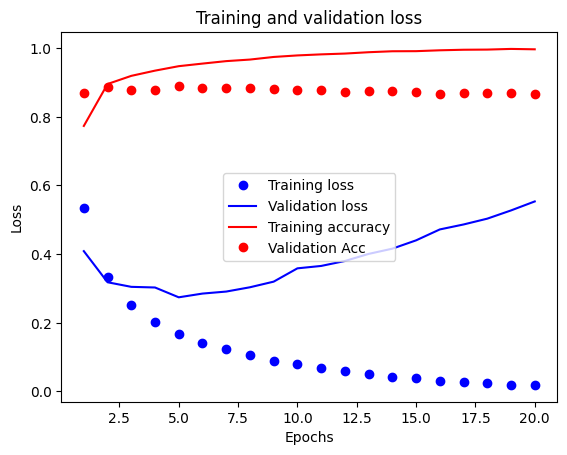

In [48]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") # bo: blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.plot(epochs, acc_values, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'ro', label = 'Validation Acc')
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

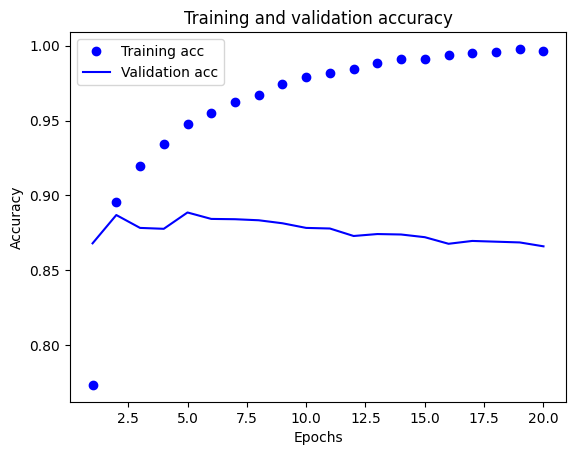

In [49]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [50]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7312 - loss: 0.5807
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8959 - loss: 0.3148
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9166 - loss: 0.2369
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9289 - loss: 0.1982
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8791 - loss: 0.3025


In [51]:
results

[0.29820534586906433, 0.8813999891281128]

### Using a trained model to generate predictions on new data

In [52]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.3122549 ],
       [0.99996877],
       [0.97449446],
       ...,
       [0.13986011],
       [0.13876174],
       [0.7885524 ]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [53]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [54]:
len(train_data)

8982

In [55]:
len(test_data)

2246

In [56]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [57]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [66]:
train_labels[:10]

array([ 3,  4,  3,  4,  4,  4,  4,  3,  3, 16])

In [60]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### Preparing the data

**Encoding the input data**

In [61]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [67]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) # 0행렬을 만들고
    for i, label in enumerate(labels):
        results[i, label] = 1. # label값의 인덱스를 1, 나머지는 0으로 지정
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [68]:
train_labels[:3]

array([3, 4, 3])

In [69]:
y_train[:3] # 원핫인코딩으로 변환됨(3 -> 4번인덱스에 1)

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [73]:
from tensorflow.keras.utils import to_categorical
# to_categorical을 쓰면 간단하다
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Building your model

**Model definition**

In [74]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
# softmax: sigmoid의 확장, 다중분류 확률 출력
])

**Compiling the model**

In [75]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [76]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [77]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.3453 - loss: 3.3562 - val_accuracy: 0.6170 - val_loss: 1.9978
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6678 - loss: 1.7492 - val_accuracy: 0.6960 - val_loss: 1.4302
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7386 - loss: 1.2761 - val_accuracy: 0.7330 - val_loss: 1.2143
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7805 - loss: 1.0439 - val_accuracy: 0.7650 - val_loss: 1.0979
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8124 - loss: 0.8794 - val_accuracy: 0.7800 - val_loss: 1.0303
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8511 - loss: 0.7025 - val_accuracy: 0.7880 - val_loss: 0.9785
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8650 - loss: 0.6144 - val_accuracy: 0.8080 - val_loss: 0.9356
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8911 - loss: 0.5168 - val_accuracy: 0.8130 - 

**Plotting the training and validation loss**

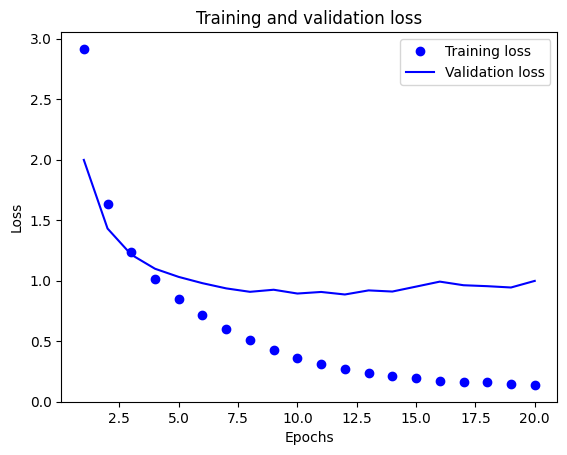

In [78]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

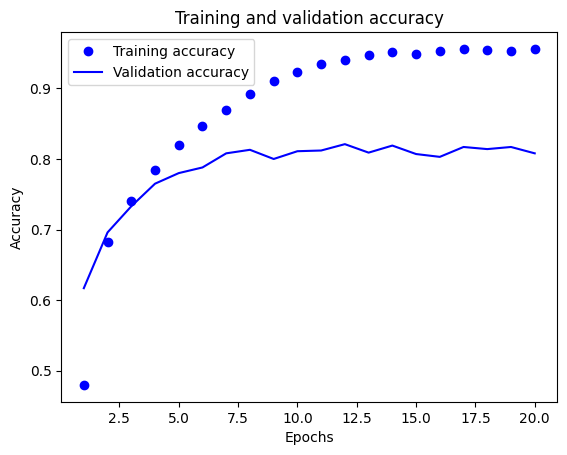

In [79]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [80]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3668 - loss: 3.2388
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6656 - loss: 1.6403
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7403 - loss: 1.1946
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7921 - loss: 0.9690
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8268 - loss: 0.8085
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8644 - loss: 0.6525
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8848 - loss: 0.5486
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9096 - loss: 0.4466
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9197 - loss: 0.3871
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8132 - loss: 0.8783


In [81]:
results

[0.896138608455658, 0.8058770895004272]

In [82]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.1745325022261799)

### Generating predictions on new data

In [83]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [84]:
predictions[0].shape

(46,)

In [85]:
print(np.sum(predictions[0])) # 각 확률의 총합 = 1

1.0


In [86]:
print(np.argmax(predictions[0])) # 가장 높은 확률을 가지는 인덱스를 출력함

3


### A different way to handle the labels and the loss

In [87]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [88]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # 원핫인코딩으로 안넣을 때
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [89]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"), #이렇게 하는 것은 좋지 않음
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4562 - loss: 3.1119 - val_accuracy: 0.5890 - val_loss: 1.8456
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6101 - loss: 1.6830 - val_accuracy: 0.6300 - val_loss: 1.4782
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6600 - loss: 1.3581 - val_accuracy: 0.6840 - val_loss: 1.3785
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7249 - loss: 1.1724 - val_accuracy: 0.6920 - val_loss: 1.3261
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7460 - loss: 1.0416 - val_accuracy: 0.7030 - val_loss: 1.3197
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7412 - loss: 1.0012 - val_accuracy: 0.7060 - val_loss: 1.2699
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7662 - loss: 0.8893 - val_accuracy: 0.7040 - val_loss: 1.3162
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7928 - loss: 0.8024 - val_accuracy: 0.7140 - val_loss

### Further experiments

### Wrapping up

## Predicting house prices: A regression example
* 얘는 회귀 문제임

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [90]:
from tensorflow.keras.datasets import boston_housing
import numpy as np
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
from tensorflow import keras
from tensorflow.keras import layers

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [91]:
train_data.shape

(404, 13)

In [92]:
test_data.shape

(102, 13)

In [93]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [96]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std # 데이터 정규화 작업
test_data -= mean
test_data /= std # 여기서 중요한 것은 정규화 시 train데이터의 mean과 std로 빼주고 나눠주어야 함

### Building your model

**Model definition**

In [97]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation = 'relu'),
        layers.Dense(16, activation = 'relu'),
        layers.Dense(8, activation = 'relu'),
        layers.Dense(1) # regression problem이므로 노드 수 1개
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"]) # loss로 MSE 사용
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [98]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # 데이터를 4개로 나눠 순차적으로 val data를 지정
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0) # 얘는 validation data를 뺀 나머지 애들
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [99]:
all_scores

[2.3038809299468994, 2.49988055229187, 2.421623706817627, 2.389497756958008]

In [100]:
np.mean(all_scores)

np.float64(2.403720736503601)

**Saving the validation logs at each fold**

In [101]:
num_epochs = 1000
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history) # append해서 각각의 fold의 log를 저장
all_mae_histories

Processing fold #0
Processing fold #1


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
np.mean([x[0] for x in all_mae_histories])

np.float64(8.840100884437561)

In [ ]:
import matplotlib.pyplot as plt

**Plotting validation scores**

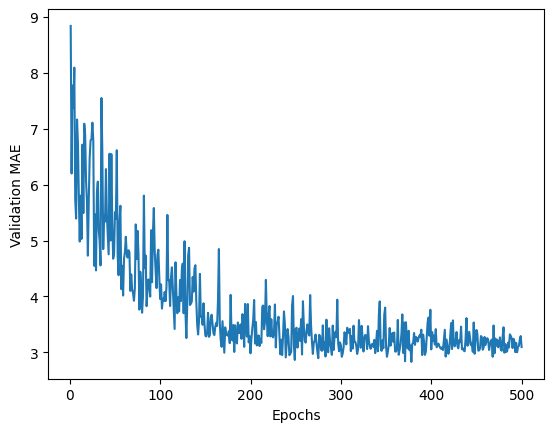

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

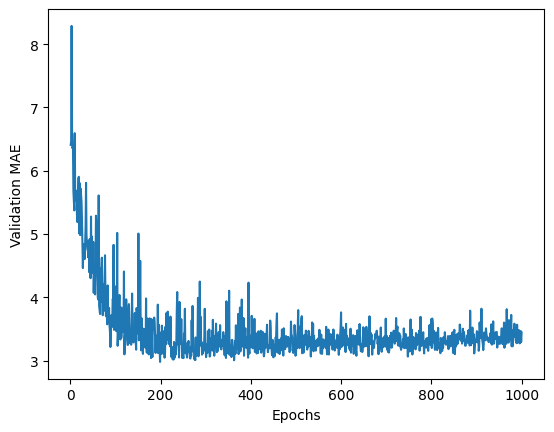

In [ ]:
plt.plot(range(1, len(average_mae_history2) + 1), average_mae_history2)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

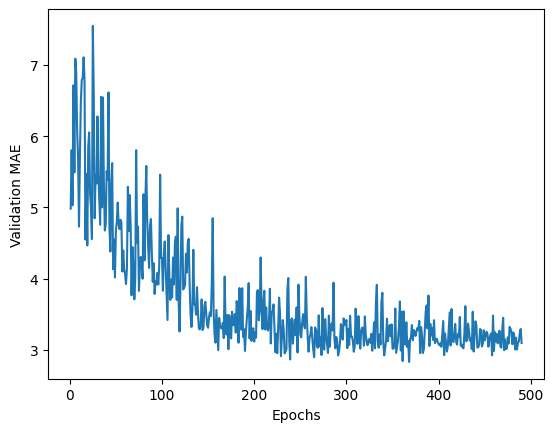

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

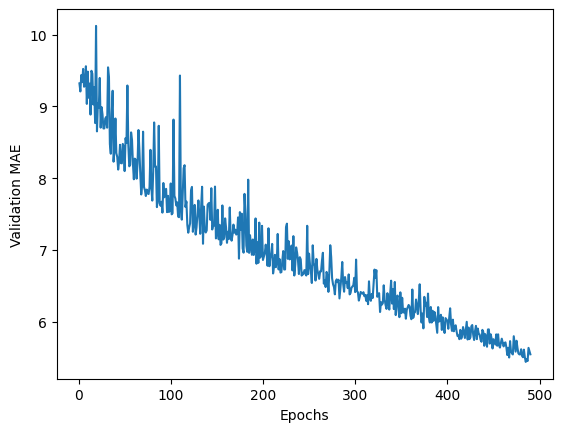

In [ ]:
truncated_mae_history = average_mae_history2[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 29.9719 - mae: 4.0526


In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary